## Проект по данным ФГБОУ ВО СПбГПМУ

В этом проекте вам предстоит проанализировать данные федерального медицинского центра ФГБОУ ВО СПбГПМУ. Вам нужно узнать, какие факторы влияют на время, которое занимает процесс от выдачи направления до поступления в медицинский центр.

Описание данных:
`hospital.csv` —  данные федерального медицинского центра ФГБОУ ВО СПбГПМУ.

Поля таблицы `hospital.csv`:  
`ДАТА_ПОСТУПЛЕНИЯ` — дата поступления пациента в отделение;  
`ДАТА_ВЫПИСКИ` — дата выписки пациента из отделения;  
`УНИКАЛЬНЫЙ_ID` — идентификатор пациента;  
`НОМЕР_ИБ` — системное поле (номер информационной безопасности);  
`ШИФР` — системное поле;  
`РЕГИОН` — регион проживания пациента;  
`ПЛАТЕЛЬЩИК` — наименование плательщика;  
`ИСТОЧНИК_ФИНАНСИРОВАНИЯ` — ОМС или другой вариант;  
`ОТДЕЛЕНИЕ` — название отделения;  
`ПРОФИЛЬ` — профиль отделения (например, терапия, хирургия);  
`КОЙКО_ДНИ` — количество дней лечения в стационаре;  
`ПЛАНОВО_ЭКСТРЕННО` — поступил планово или экстренно;  
`КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ` — код диагноза при поступлении;  
`КОД_МКБ_ПРИ_ВЫПИСКЕ` — код диагноза при выписке.  

### Цель

Какие факторы влияют на время, которое занимает процесс от выдачи направления до поступления в медицинский центр.

### Задачи:  
Шаг 1. Подготовка данных  
1. Посчитайте и сохраните данные в отдельный датафрейм.
2. Выберите более оптимальные варианты для названий (меток) столбцов и замените их.
3. Изучите, встречаются ли пропуски в данных и в каких столбцах. Обработайте их.
4. Проверьте, используются ли корректные типы данных. Предложите свои рекомендации по изменению.
5. Изучите дубликаты. Удалите их при надобности.
    
Шаг 2. Исследовательский анализ данных
1. Изучите распределение длительности госпитализации пациентов. В этом вам поможет гистограмма, или «ящик с усами».
2. Изучите среднюю длительность госпитализации по отделениям. Изучите десять отделений, где длительности госпитализации пациентов наибольшая.
3. Исследуйте динамику количества поступивших пациентов в разные месяцы (учитывая различия в годах).
   
Шаг 3. Проверка гипотез  
1. Руководство хочет проверить, отличается ли средняя длительность госпитализации пациентов от стандартного семидневного срока. Проверьте эту гипотезу.
2. Медицинский отдел хочет проверить, превышает ли средняя длительность госпитализации пациентов 10 дней.
3. Необходимо проверить, отличается ли средняя длительность лечения в стационаре между плановыми и экстренными пациентами.

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [222]:
try:
    hospital = pd.reav_csv('hospital.csv')
except:
    hospital = pd.read_csv('https://code.s3.yandex.net/datasets/hospital.csv')

In [223]:
hospital.head()

,ДАТА_ПОСТУПЛЕНИЯ,ДАТА_ВЫПИСКИ,УНИКАЛЬНЫЙ_ID,НОМЕР_ИБ,ШИФР,РЕГИОН,ПЛАТЕЛЬЩИК,ИСТОЧНИК_ФИНАНСИРОВАНИЯ,ОТДЕЛЕНИЕ,ПРОФИЛЬ,КОЙКО_ДНИ,ПЛАНОВО_ЭКСТРЕННО,КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ,КОД_МКБ_ПРИ_ВЫПИСКЕ
0,01.01.2019,10.01.2019,858042000,1,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Микрохирургическое отделение,Сосудистой хирургии,10.0,Экстренная,S61.7,S66.4
1,01.01.2019,01.01.2019,993109000,3,5.13.1,NaN,"СПб филиал ООО ""СМК РЕСО - Мед""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
2,01.01.2019,01.01.2019,993111000,4,5.12.1,NaN,"ООО ""Капитал Медицинское Страхование""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
3,01.01.2019,07.01.2019,993110000,2,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Инфекционное отделение №1,Инфекционные,7.0,Экстренная,B27.9,J03.9
4,01.01.2019,05.01.2019,987185000,5,1.1.1,NaN,Коммерческие,Наличный расчет,ПЦ Акушерское физиологическое отделение,Для беременных и рожениц,5.0,Плановая,O42.9,O82.1


In [224]:
hospital.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125261 entries, 0 to 125260
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ДАТА_ПОСТУПЛЕНИЯ         125261 non-null  object 
 1   ДАТА_ВЫПИСКИ             125261 non-null  object 
 2   УНИКАЛЬНЫЙ_ID            125261 non-null  int64  
 3   НОМЕР_ИБ                 125261 non-null  int64  
 4   ШИФР                     125261 non-null  object 
 5   РЕГИОН                   56391 non-null   object 
 6   ПЛАТЕЛЬЩИК               125261 non-null  object 
 7   ИСТОЧНИК_ФИНАНСИРОВАНИЯ  125261 non-null  object 
 8   ОТДЕЛЕНИЕ                125261 non-null  object 
 9   ПРОФИЛЬ                  125261 non-null  object 
 10  КОЙКО_ДНИ                125261 non-null  float64
 11  ПЛАНОВО_ЭКСТРЕННО        125261 non-null  object 
 12  КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ  125253 non-null  object 
 13  КОД_МКБ_ПРИ_ВЫПИСКЕ      125257 non-null  object 
dtypes: f

In [225]:
# Оценим объем пропусков, это пригодится на стадии обработки
hospital.isna().sum()/hospital.shape[0]*100

ДАТА_ПОСТУПЛЕНИЯ            0.000000
ДАТА_ВЫПИСКИ                0.000000
УНИКАЛЬНЫЙ_ID               0.000000
НОМЕР_ИБ                    0.000000
ШИФР                        0.000000
РЕГИОН                     54.981199
ПЛАТЕЛЬЩИК                  0.000000
ИСТОЧНИК_ФИНАНСИРОВАНИЯ     0.000000
ОТДЕЛЕНИЕ                   0.000000
ПРОФИЛЬ                     0.000000
КОЙКО_ДНИ                   0.000000
ПЛАНОВО_ЭКСТРЕННО           0.000000
КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ     0.006387
КОД_МКБ_ПРИ_ВЫПИСКЕ         0.003193
dtype: float64

### Промежуточный вывод по разделу:

Датасет `hospital` содержит в себе 14 столбцов и 125261 строку. Название полей неудобны для дальнейшей работы  на стадии обработки данных их стоит переназвать. В данных присутсвуют пропуски, которые также следует обработать, в некоторых полях тип данных определен неверно и его необходимо заменить. 

## Предобработка данных

In [228]:
# Для начал заменм название столбцов
hospital.columns = ['income_date', 'outcome_date', 'user_id', 'is_num', 'code', 'region',
                   'payer', 'fin_source', 'dept', 'profile', 'bed_days', 'is_plan', 'incone_mkb', 'outcome_mkb']

In [229]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125261 entries, 0 to 125260
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   income_date   125261 non-null  object 
 1   outcome_date  125261 non-null  object 
 2   user_id       125261 non-null  int64  
 3   is_num        125261 non-null  int64  
 4   code          125261 non-null  object 
 5   region        56391 non-null   object 
 6   payer         125261 non-null  object 
 7   fin_source    125261 non-null  object 
 8   dept          125261 non-null  object 
 9   profile       125261 non-null  object 
 10  bed_days      125261 non-null  float64
 11  is_plan       125261 non-null  object 
 12  incone_mkb    125253 non-null  object 
 13  outcome_mkb   125257 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 13.4+ MB


Теперь рассмотрим типы данных: даты - определны как объекты и койко-дни - вещественные значения, но при этом там хранятся данные о целых днях, при этом пропусков в данных нет.

In [231]:
hospital['income_date'] = pd.to_datetime(hospital['income_date'], format = '%d.%m.%Y')
hospital['outcome_date'] = pd.to_datetime(hospital['outcome_date'], format = '%d.%m.%Y')
hospital['bed_days'] = pd.to_numeric(hospital['bed_days'], downcast = 'integer')

Больше всего пропусков находятся в поел региона. Также есть пропуски в полях с кодами мкб при поступлении и выписки, но в них количетво пропусков минимально и ими можно принебречь.

В списке задач нет ни одной связанной с регионом, также сами пропуски проблематично заполнить на основе имеющихся данных.

In [234]:
hospital = hospital.dropna(subset = ['incone_mkb', 'outcome_mkb'])

In [235]:
hospital = hospital.drop(columns = ['region'])

In [236]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125251 entries, 0 to 125260
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   income_date   125251 non-null  datetime64[ns]
 1   outcome_date  125251 non-null  datetime64[ns]
 2   user_id       125251 non-null  int64         
 3   is_num        125251 non-null  int64         
 4   code          125251 non-null  object        
 5   payer         125251 non-null  object        
 6   fin_source    125251 non-null  object        
 7   dept          125251 non-null  object        
 8   profile       125251 non-null  object        
 9   bed_days      125251 non-null  int16         
 10  is_plan       125251 non-null  object        
 11  incone_mkb    125251 non-null  object        
 12  outcome_mkb   125251 non-null  object        
dtypes: datetime64[ns](2), int16(1), int64(2), object(8)
memory usage: 12.7+ MB


Теперь пропусков в данных нет.

Проверим наличие дубликатов в данных.

In [239]:
hospital_duplicated = hospital.duplicated(keep = False).sum()
hospital_duplicated

8820

В данных содержится 8820 диублирующих записи, избавимся от них сохраним только первую в качестве уникальной.

In [241]:
hospital = hospital.drop_duplicates(keep = 'first')

Теперь данные готов для выполнения задач от заказчика.

### Промежуточный вывод

В ходе работы в разделе были преобразованы типы данных, изменены названия столбцов, удалены пропуски и дубликаты.
После предобработки данных количество строк и столбцов уменьшилось. Теперь датафрейм содержит 13 столбцов и 125251 строку.

## Шаг 2. Исследовательский анализ данных

1. Изучите распределение длительности госпитализации пациентов. В этом вам поможет гистограмма, или «ящик с усами».

2. Изучите среднюю длительность госпитализации по отделениям. 

3. Изучите десять отделений, где длительности госпитализации пациентов наибольшая.


4. Исследуйте динамику количества поступивших пациентов в разные месяцы (учитывая различия в годах)

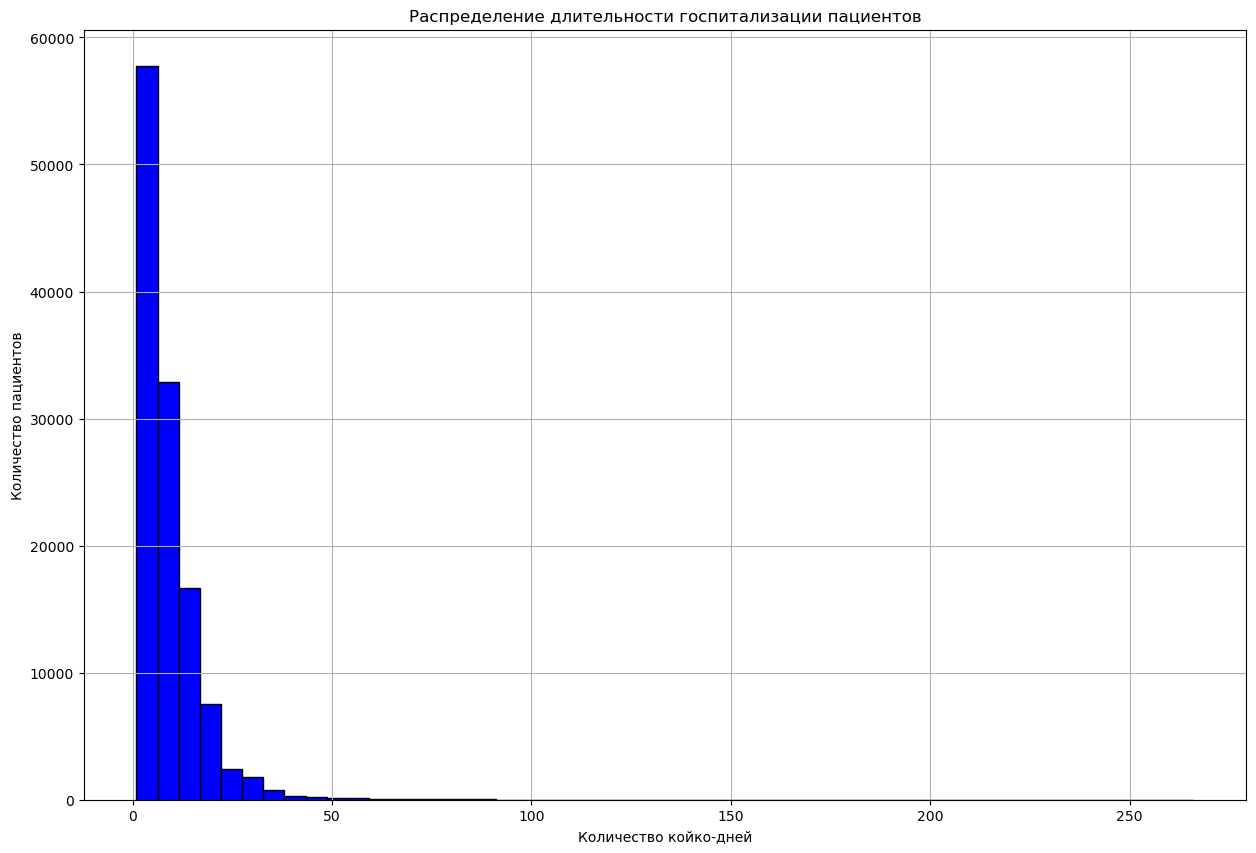

In [245]:
plt.figure(figsize = (15,10))
hospital['bed_days'].plot(kind = 'hist', bins = 50, color = 'blue', title = 'Распределение длительности госпитализации пациентов',
                         xlabel = 'Количество койко-дней', ylabel = 'Количество пациентов', edgecolor = 'black')
plt.grid()
plt.show()

Больше всего госпитализаций длятся менее 25 дней. Распределение смещено влево, что говорит о частоте встреч коротких госптилизаций по сравнению с длительными. Есть ряд пациентов, госпитализация которых превышает 50 дней, их количетво небольшое. Возможно это пациенты с хроническими заболеваниями.

Построим "ящик с усам".

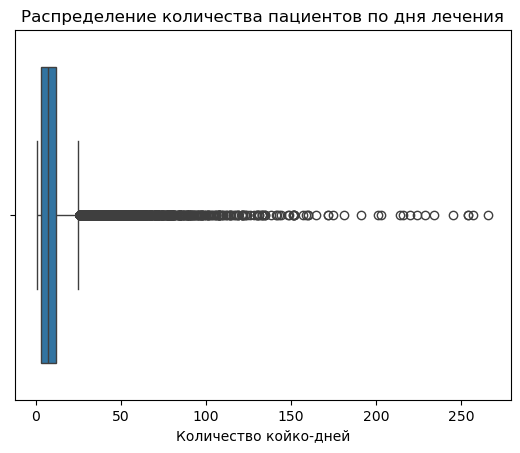

In [247]:
plt.figure(figure = (16,6))
sns.boxplot(x=hospital['bed_days'])
plt.xlabel('Количество койко-дней')
plt.title('Распределение количества пациентов по дня лечения')
plt.show()

Выбросы не дают оценить статистические показатели данных. Избавимся от них.

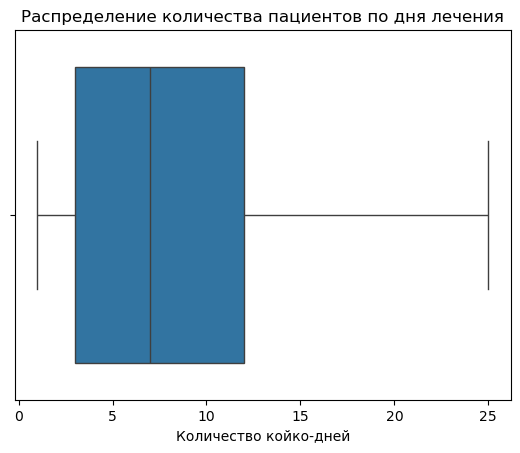

In [249]:
plt.figure(figure = (16,6))
sns.boxplot(x=hospital['bed_days'], showfliers = False)
plt.xlabel('Количество койко-дней')
plt.title('Распределение количества пациентов по дня лечения')
plt.show()

In [250]:
hospital['bed_days'].describe()

count    120836.000000
mean          8.728508
std           8.765610
min           1.000000
25%           3.000000
50%           7.000000
75%          12.000000
max         266.000000
Name: bed_days, dtype: float64

В среднем количество койка-дней проводимых в госпитализации составляет 8.73 дня. При этом средне-квадратичное отклонение составляет 8.77, что является большим число, говорящим о большом разбросе в данных. Минимальное количество дней равно 1 а максимальное - 266. Медианное значение составлет 7 дней. Среднее в давнном случае подвержено выбросам.

### Средняя длительность госпитализации по отделениям

In [253]:
dept_days = hospital.groupby('dept')['bed_days'].mean().sort_values(ascending = False)
display(dept_days)

dept
Отделение анестезиологии-реанимации                                                                          45.179487
ПЦ ОАРИТН №1 (новорожденных)                                                                                 28.723214
ПЦ Отделение Анестезиологии-реанимации для детей с кардиохирургической патологией                            26.438095
ПЦ Отделение патологии новорожденных и детей грудного возраста                                               22.098196
ПЦ Отделение вспомогательных репродуктивных технологий ДС                                                    21.297802
Дневной стационар Кожно-венерологического отделения                                                          14.027322
Дневной стационар Гастроэнтерологического отделения                                                          13.339286
Микрохирургическое отделение                                                                                 13.293007
Педиатрическое отделение №1                

Самые длительные госпитализации наблюдаются в следующих отделениях:

отделение анестезиологии-реанимации (45.2 дней) – это логично, так как пациенты в реанимации находятся в тяжёлом состоянии и часто требуют интенсивной терапии;
ПЦ ОАРИТН №1 (новорождённых) – 28.7 дней – новорождённые с осложнениями или недоношенные дети требуют длительного медицинского наблюдения;
кардиохирургическая реанимация для детей (26.4 дней) – длительный период наблюдения после сложных операций.
Краткосрочные госпитализации (< 5 дней): ПЦ ОАРИТ №2 для беременных, рожениц и родильниц (1.5 дня) – вероятно, связано с коротким наблюдением после родов; ПЭМП ДПО (1 день) – возможно, это диагностическое отделение или экстренная помощь, где пациенты не задерживаются.

Определим Топ-10 отделений с наибольшей средней длительностью лечения. Оформим результат в виде горизонтального столбчатого графика (barh). dept_stay.head(10).plot(kind='barh', color='skyblue', edgecolor='black') с помощью color зададим цвет, а границы определим чёрным цветом.

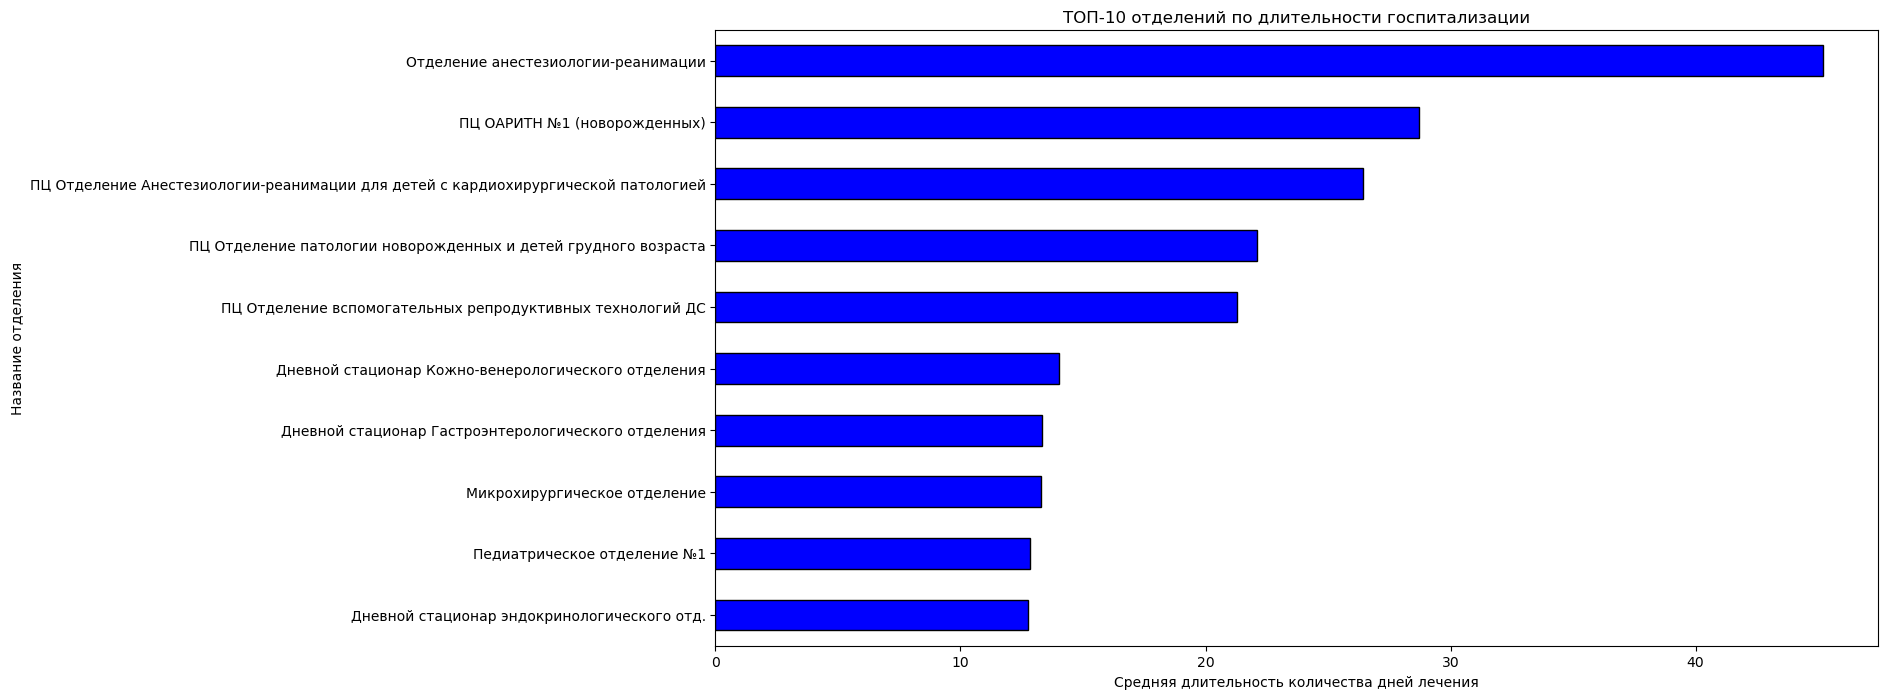

In [255]:
plt.figure(figsize = (15,8))
dept_days.head(10).sort_values(ascending = True).plot (kind = 'barh', color = 'blue', edgecolor = 'black', xlabel = 'Средняя длительность количества дней лечения',
                ylabel = 'Название отделения', title = 'ТОП-10 отделений по длительности госпитализации')
plt.show()

### В разные годы рассчитать количество поступивших пациентов по месяцам

In [286]:
# Создадим новый столбец, в котором будет содержаться информация о годе и месяце поступления
hospital['month_income'] = hospital['income_date'].dt.to_period('M')
user_by_month = hospital.groupby('month_income')['user_id'].nunique()

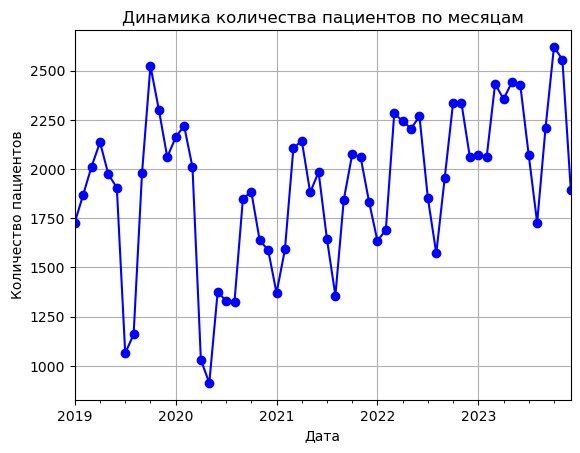

In [288]:
user_by_month.plot(kind = 'line', linestyle = '-', color = 'blue', marker = 'o')
plt.title('Динамика количества пациентов по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество пациентов')
plt.grid()
plt.show()

## Шаг 3. Проверка гипотез

Руководство хочет проверить, отличается ли средняя длительность госпитализации пациентов от стандартного семидневного срока. Проверьте эту гипотезу.  
Медицинский отдел хочет проверить, превышает ли средняя длительность госпитализации пациентов 10 дней.  
Необходимо проверить, отличается ли средняя длительность лечения в стационаре между плановыми и экстренными пациентами.

### Руководство хочет проверить, отличается ли средняя длительность госпитализации пациентов от стандартного семидневного срока. Проверьте эту гипотезу.

Гипотеза:  
Н0 - средняя длительность госпитализации в больницах составляет 7 дней ( = 7)  
Н1 - средняя длительность госпитализации в больница не равна 7 дням ( != 7)

In [301]:
expected_mean_time = 7
alpha = 0.05
mean_bed_days = hospital['bed_days'].mean()
print('Среднее количество дней госпитализации состалвяет:', mean_bed_days)
results = st.ttest_1samp(hospital['bed_days'], expected_mean_time, alternative = 'two-sided')

print ('p-value', results.pvalue)
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')

Среднее количество дней госпитализации состалвяет: 8.728508060511768
p-value 0.0
Отвергаем нулевую гипотезу


Среднее количество дней, которое пациенты проводят в госпитализации составляет 8.73. Это сильно отличается от предполагаемой средней длительности госпитализации, что пожтверждается статистическим тестом и результатом pvalue равным 0.

### Теперь медицинский отдел хочет проверить, превышает ли средняя длительность госпитализации пациентов 10 дней

Гипотеза:  
Н0 - средняя длительность госпитализации в больницах составляет 10 дней ( = 10)  
Н1 - средняя длительность госпитализации в больница больше 10 дней ( > 10)

In [309]:
expected_mean_price = 10

results = st.ttest_1samp(hospital['bed_days'], expected_mean_price, alternative = 'greater')
print ('p-value = ', results.pvalue)
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отклонять нулеую гипотезу')

p-value =  1.0
Нет оснований отклонять нулеую гипотезу


Видно, что p-значение очень большое, а это значит что отвергнуть нулевую гипотезу не получилось. Следовательно, нельзя утверждать, что средняя длительность госпитализации пациентов статистически значимо превышает 10 дней.

### Проверка гипотез с двумя выборками

Необходимо изучить, различается ли средняя продолжительность лечения в стационаре между плановыми и экстренными пациентами?  
Гипотеза:  
Н0 - среднее количество дней лечения в стационаре не отличается между плановыми и экстренными пациентами (плановые = экстренное)  
Н1 - среднее количество дней лечения в станционаре отличается между плановыми и экстренными пациентами (плановые != экстренные)

In [315]:
plan_group = hospital[hospital['is_plan'] == 'Плановая']['bed_days']
urgent_group = hospital[hospital['is_plan'] == 'Экстренная']['bed_days']

In [317]:
plan_group.mean()

9.716638313138677

In [319]:
urgent_group.mean()

6.248380631481105

Длительность госпитализации плановых и экстренных пациентов отличается на три дня, стоит оценить насколько это статистически значимая разница.

In [322]:
results = st.ttest_ind(
    plan_group,
    urgent_group,
    alternative='two-sided')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0
Отвергаем нулевую гипотезу


Таким образом, нельзя говорить, что среднее количество дней лечения в стационаре отличается между плановыми и экстренными пациентами одинаково. С точки зрения статистики, разница недостаточно значима.

Выводы
Анализ распределения количества дней лечения в стационаре с помощью гистограммы показал, что большинство пациентов пребывают в больнице относительно недолго. Ту же тенденцию подтвердил box plot. Поэтому для нормального функционирования отделений важно было проверить гипотезу: действительно ли средняя продолжительность госпитализации равна неделе?

Вы сравнили среднее по выборке с определённым числом, используя одновыборочный t-тест Стьюдента. В результате теста нулевая гипотеза была отвергнута.

Для анализа максимальной загрузки коечного фонда была проверена гипотеза: превышает ли средняя продолжительность госпитализации 10 дней. В этом случае нулевая гипотеза не была отвергнута. Это означает, что нет достаточных статистических оснований утверждать, что среднее время пребывания пациентов превышает 10 дней. Это говорит о том, что текущая средняя продолжительность госпитализации не создаёт значительных рисков переполнения стационара.

Кроме того нужно было проверить гипотезу, которая затрагивала экстренную и плановую госпитализации. Визуально (например, по средним значениям) разница есть, но важно понять, насколько она значима с точки зрения статистики. Для сравнения двух независимых групп применили t-тест Стьюдента для двух выборок.

Уровень значимости задали в 5%. То есть приняли 5%-ный риск сделать ошибку, если в действительности разницы между группами нет. Другими словами, в 5 случаях из 100 можно случайно обнаружить различие, которого на самом деле нет.

Как это влияет на решение

Если p-value (результат статистического теста) меньше 0.05 → отвергаем нулевую гипотезу, считаем различие статистически значимым.
Если p-value больше 0.05 → недостаточно данных, чтобы отвергнуть нулевую гипотезу.
Вы сравнили среднюю длительность госпитализации между экстренными и плановыми пациентами. Получили p-value < 0.05, что говорит о значимых различиях между группами. Это значит, что вероятность того, что разница между средними значениями случайна, меньше 5%. Таким образом, мы отвергаем нулевую гипотезу и утверждаем, что различие между средними значениями групп существует.

Эти результаты можно использовать для оптимизации коечного фонда и планирования загрузки стационара.